In [3]:
import pandas as pd
df = pd.read_csv('NYC_2019/AB_NYC_2019.csv')
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
df.shape

(48895, 16)

In [6]:
df.size

782320

In [7]:
df.describe() 

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
cols = list(df.columns)
nom_cols_data = [{name: df[col].to_list().count(name) for name in df[col].unique()}
                 for col in cols
                 if df[col].dtype == "object"]
nom_cols_data



[{'Clean & quiet apt home by the park': 1,
  'Skylit Midtown Castle': 1,
  'THE VILLAGE OF HARLEM....NEW YORK !': 1,
  'Cozy Entire Floor of Brownstone': 1,
  'Entire Apt: Spacious Studio/Loft by central park': 1,
  'Large Cozy 1 BR Apartment In Midtown East': 1,
  'BlissArtsSpace!': 1,
  "Large Furnished Room Near B'way ": 1,
  'Cozy Clean Guest Room - Family Apt': 1,
  'Cute & Cozy Lower East Side 1 bdrm': 1,
  'Beautiful 1br on Upper West Side': 1,
  'Central Manhattan/near Broadway': 1,
  'Lovely Room 1, Garden, Best Area, Legal rental': 1,
  'Wonderful Guest Bedroom in Manhattan for SINGLES': 1,
  'West Village Nest - Superhost': 1,
  'Only 2 stops to Manhattan studio': 1,
  'Perfect for Your Parents + Garden': 1,
  'Chelsea Perfect': 1,
  'Hip Historic Brownstone Apartment with Backyard': 1,
  'Huge 2 BR Upper East  Cental Park': 1,
  'Sweet and Spacious Brooklyn Loft': 1,
  'CBG CtyBGd HelpsHaiti rm#1:1-4': 1,
  'CBG Helps Haiti Room#2.5': 1,
  'CBG Helps Haiti Rm #2': 1,
  'MAI

In [4]:
from operator import itemgetter
import matplotlib.pyplot as plt
# самые часто встречаемые районы 
region_dt = [(name, df["neighbourhood"].to_list().count(name)) 
                  for name in df["neighbourhood"].unique() 
                  if df["neighbourhood"].to_list().count(name) > 1500]
region_dt = sorted(region_dt, key=itemgetter(1))
region_dt

[('Midtown', 1545),
 ('Crown Heights', 1564),
 ('Upper East Side', 1798),
 ('East Village', 1853),
 ("Hell's Kitchen", 1958),
 ('Upper West Side', 1971),
 ('Bushwick', 2465),
 ('Harlem', 2658),
 ('Bedford-Stuyvesant', 3714),
 ('Williamsburg', 3920)]

<BarContainer object of 10 artists>

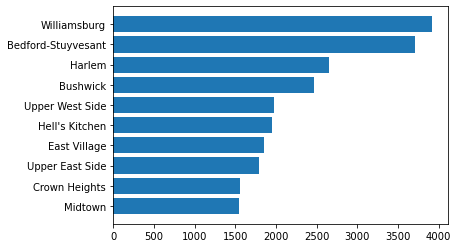

In [5]:
regions = []
counts = []
for region, count in region_dt :
  regions.append(region)
  counts.append(count)
plt.barh(regions, counts)

In [11]:
# тип жилья по всем районам
room_type_dt = {room_type: df["room_type"].to_list().count(room_type) for room_type in set(df["room_type"])}
print(room_type_dt) 
# получилось три варианта. Построим две круговые диаграммы.

{'Private room': 22326, 'Shared room': 1160, 'Entire home/apt': 25409}


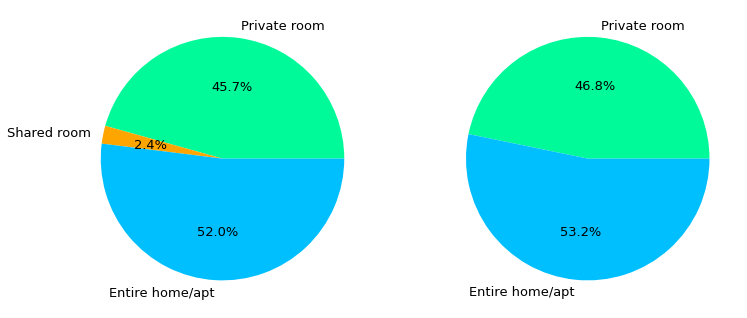

In [12]:
cases1 = []
room_1 = []
for room_type, cases_num in room_type_dt.items():
  room_1.append(room_type)
  cases1.append(cases_num)

room_info_1 = pd.DataFrame({"": cases1},
                       index=room_1)

cases2 = []
room_2 = []
for room_type, cases_num in room_type_dt.items():
  if room_type != "Shared room":
    room_2.append(room_type)
    cases2.append(cases_num)

room_info_2 = pd.DataFrame({"": cases2},
                       index=room_2)

fig, axes = plt.subplots(nrows=1, ncols=2)
room_info_1.plot.pie(ax=axes[0], y="",
                 colors=["mediumspringgreen", "orange" ,"deepskyblue"],
                 autopct="%.1f%%",
                 legend = False,
                 fontsize=13,
                 figsize=(12, 12));
room_info_2.plot.pie(ax=axes[1], y="",
                 colors=["mediumspringgreen", "deepskyblue",],
                 autopct="%.1f%%",
                 legend = False,
                 fontsize=13,
                 figsize=(12, 12));

In [13]:
# проверим остается ли такое распределение в найденных раннее районах
data_region = [(name,
                   df["neighbourhood"].to_list().count(name),
                   df.query("room_type == 'Entire home/apt'")["neighbourhood"].to_list().count(name),
                   df.query("room_type == 'Private room'")["neighbourhood"].to_list().count(name),
                   df.query("room_type == 'Shared room'")["neighbourhood"].to_list().count(name)) 
                  for name in df["neighbourhood"].unique() 
                  if df["neighbourhood"].to_list().count(name) > 1500]

data_region = sorted(data_region, key=itemgetter(1))
region_df = pd.DataFrame.from_records(data_region, 
                                         columns=["Region", "Total", "Entire home/apt", "Private room","Shared room"])
region_df

,Region,Total,Entire home/apt,Private room,Shared room
0,Midtown,1545,1100,422,23
1,Crown Heights,1564,759,780,25
2,Upper East Side,1798,1310,441,47
3,East Village,1853,1170,660,23
4,Hell's Kitchen,1958,1187,672,99
5,Upper West Side,1971,1256,675,40
6,Bushwick,2465,678,1719,68
7,Harlem,2658,1036,1573,49
8,Bedford-Stuyvesant,3714,1591,2038,85
9,Williamsburg,3920,1891,1997,32


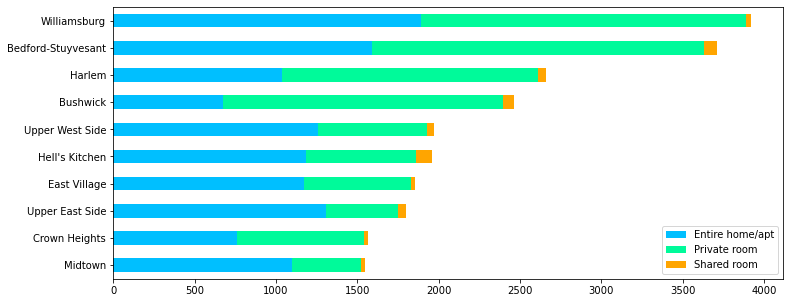

In [14]:
df_draw = pd.DataFrame({"Entire home/apt": region_df["Entire home/apt"].to_list(),
                        "Private room": region_df["Private room"].to_list(),
                        "Shared room": region_df["Shared room"].to_list()},
                       index=region_df["Region"].to_list())
df_draw.plot.barh(color=["deepskyblue", "mediumspringgreen", "orange"],
                  stacked=True,
                  figsize=(12, 5));

In [15]:
data_region_1 = [(name,
                   df["neighbourhood_group"].to_list().count(name),
                   df.query("room_type == 'Entire home/apt'")["neighbourhood_group"].to_list().count(name),
                   df.query("room_type == 'Private room'")["neighbourhood_group"].to_list().count(name),
                   df.query("room_type == 'Shared room'")["neighbourhood_group"].to_list().count(name)) 
                  for name in df["neighbourhood_group"].unique() 
                  if df["neighbourhood_group"].to_list().count(name) > 0]

data_region_1 = sorted(data_region_1, key=itemgetter(1))
region_df_1 = pd.DataFrame.from_records(data_region_1, 
                                         columns=["Region", "Total", "Entire home/apt", "Private room","Shared room"])
region_df_1

,Region,Total,Entire home/apt,Private room,Shared room
0,Staten Island,373,176,188,9
1,Bronx,1091,379,652,60
2,Queens,5666,2096,3372,198
3,Brooklyn,20104,9559,10132,413
4,Manhattan,21661,13199,7982,480


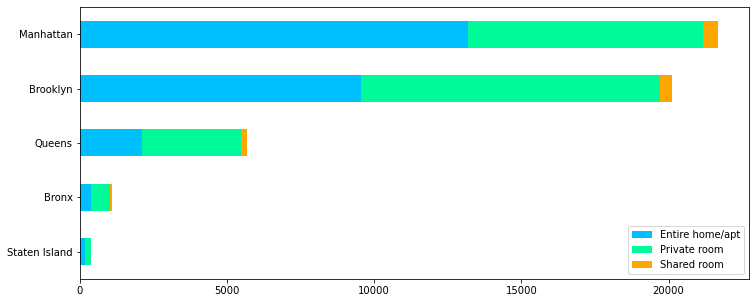

In [16]:
df_draw_1 = pd.DataFrame({"Entire home/apt": region_df_1["Entire home/apt"].to_list(),
                        "Private room": region_df_1["Private room"].to_list(),
                        "Shared room": region_df_1["Shared room"].to_list()},
                       index=region_df_1["Region"].to_list())
df_draw_1.plot.barh(color=["deepskyblue", "mediumspringgreen", "orange"],
                  stacked=True,
                  figsize=(12, 5));

In [17]:
manheten_df = df.loc[df["neighbourhood_group"] == "Manhattan"]
manheten_df_pr = manheten_df.loc[manheten_df["room_type"] == "Private room"]
print(manheten_df_pr["price"].mean())

116.7766224004009


In [18]:
manheten_df_app = manheten_df.loc[manheten_df["room_type"] == "Entire home/apt"]
print(manheten_df_app["price"].mean())

249.23910902341086


In [19]:
manheten_df_sr = manheten_df.loc[manheten_df["room_type"] == "Shared room"]
print(manheten_df_sr["price"].mean())

88.97708333333334


In [31]:
brooklyn_df = df.loc[df["neighbourhood_group"] == "Brooklyn"]
brooklyn_df_pr = brooklyn_df.loc[brooklyn_df["room_type"] == "Private room"]
print(brooklyn_df_pr["price"].mean())


76.500098697197


In [32]:
brooklyn_df_app = brooklyn_df.loc[brooklyn_df["room_type"] == "Entire home/apt"]
print(brooklyn_df_app["price"].mean())

178.32754472225128


In [33]:
brooklyn_df_sr = brooklyn_df.loc[brooklyn_df["room_type"] == "Shared room"]
print(brooklyn_df_sr["price"].mean())

50.52784503631961


In [27]:
queens_df = df.loc[df["neighbourhood_group"] == "Queens"]
queens_df_pr = queens_df.loc[queens_df["room_type"] == "Private room"]
print(queens_df_pr["price"].mean())

71.76245551601423


In [28]:
queens_df_app = queens_df.loc[queens_df["room_type"] == "Entire home/apt"]
print(queens_df_app["price"].mean())

147.05057251908397


In [29]:
queens_df_sr = queens_df.loc[queens_df["room_type"] == "Shared room"]
print(queens_df_sr["price"].mean())

69.02020202020202


In [25]:
bronx_df = df.loc[df["neighbourhood_group"] == "Bronx"]
bronx_df_pr = bronx_df.loc[bronx_df["room_type"] == "Private room"]
print(bronx_df_pr["price"].mean())

bronx_df_app = bronx_df.loc[bronx_df["room_type"] == "Entire home/apt"]
print(bronx_df_app["price"].mean())
bronx_df_sr = bronx_df.loc[bronx_df["room_type"] == "Shared room"]
print(bronx_df_sr["price"].mean())

66.78834355828221
127.5065963060686
59.8


In [24]:
staten_Island_df = df.loc[df["neighbourhood_group"] == "Staten Island"]

staten_Island_pr = staten_Island_df.loc[staten_Island_df["room_type"] == "Private room"]
print(staten_Island_pr["price"].mean())

staten_Island_app = staten_Island_df.loc[staten_Island_df["room_type"] == "Entire home/apt"]
print(staten_Island_app["price"].mean())

staten_Island_sr = staten_Island_df.loc[staten_Island_df["room_type"] == "Shared room"]
print(staten_Island_sr["price"].mean())

62.29255319148936
173.8465909090909
57.44444444444444


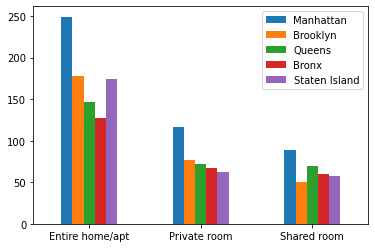

In [53]:
price_boro = pd.DataFrame({"Manhattan": [manheten_df_app["price"].mean(),manheten_df_pr["price"].mean(), manheten_df_sr["price"].mean()], 
                            "Brooklyn": [brooklyn_df_app["price"].mean(), brooklyn_df_pr["price"].mean(), brooklyn_df_sr["price"].mean()],
                            "Queens": [queens_df_app["price"].mean(), queens_df_pr["price"].mean(), queens_df_sr["price"].mean()],
                            "Bronx": [bronx_df_app["price"].mean(), bronx_df_pr["price"].mean(), bronx_df_sr["price"].mean()],
                            "Staten Island":[staten_Island_app["price"].mean(), staten_Island_pr["price"].mean(), staten_Island_sr["price"].mean()]
                          },
                             index=["Entire home/apt", "Private room", "Shared room"])
price_boro.plot.bar(rot=0);


In [150]:
# зависимость кол-во отзывов от Боро
manheten_df_1 = df.loc[df["neighbourhood_group"] == "Manhattan"]
manheten_df_2 = manheten_df_1.loc[manheten_df_1["number_of_reviews"] != 0]
print(manheten_df_2["number_of_reviews"].mean())

27.330988455988457


In [151]:
brooklyn_df_1 = df.loc[df["neighbourhood_group"] == "Brooklyn"]
brooklyn_df_2 = brooklyn_df_1.loc[brooklyn_df_1["number_of_reviews"] != 0]
print(brooklyn_df_2["number_of_reviews"].mean())

29.58436188970633


In [152]:
queens_df_1 = df.loc[df["neighbourhood_group"] == "Queens"]
queens_df_2 = queens_df_1.loc[queens_df_1["number_of_reviews"] != 0]
print(queens_df_2["number_of_reviews"].mean())

34.31351114997814


In [153]:
bronx_df_1 = df.loc[df["neighbourhood_group"] == "Bronx"]
bronx_df_2 = bronx_df_1.loc[bronx_df_1["number_of_reviews"] != 0]
print(bronx_df_2["number_of_reviews"].mean())

32.386986301369866


In [154]:
staten_Island_df_1 = df.loc[df["neighbourhood_group"] == "Staten Island"]
staten_Island_2 = staten_Island_df_1.loc[staten_Island_df_1["number_of_reviews"] != 0]
print(staten_Island_2["number_of_reviews"].mean())

36.754777070063696


Text(0, 0.5, 'Боро')

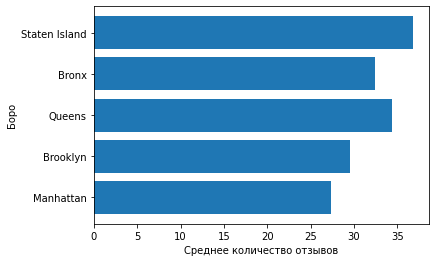

In [155]:
fig, ax = plt.subplots()
plt.barh(["Manhattan", "Brooklyn", "Queens", "Bronx","Staten Island"], [manheten_df_2["number_of_reviews"].mean(), brooklyn_df_2["number_of_reviews"].mean(), queens_df_2["number_of_reviews"].mean(), bronx_df_2["number_of_reviews"].mean(),staten_Island_2["number_of_reviews"].mean()])
ax.set_xlabel('Среднее количество отзывов')
ax.set_ylabel('Боро')

In [126]:
# Самые популярные районы по количеству объявлений в каждом боро
manheten= df.loc[df["neighbourhood_group"] == "Manhattan"]
cout = [1,1,1,1,1]
name_region = [0,0,0,0,0]
for name in manheten["neighbourhood"].unique():
    if manheten["neighbourhood"].to_list().count(name) > cout[0]:
      cout[0] =  manheten["neighbourhood"].to_list().count(name)
      name_region[0] = name + " (Manhattan)"
print(cout[0], name_region[0])

2658 Harlem (Manhattan)


In [127]:
brooklyn = df.loc[df["neighbourhood_group"] == "Brooklyn"]
for name in brooklyn["neighbourhood"].unique():
    if brooklyn["neighbourhood"].to_list().count(name) > cout[1]:
      cout[1] =  brooklyn["neighbourhood"].to_list().count(name)
      name_region[1] = name + " (Brooklyn)"
print(cout[1], name_region[1])

3920 Williamsburg (Brooklyn)


In [128]:
queens = df.loc[df["neighbourhood_group"] == "Queens"]
for name in queens["neighbourhood"].unique():
    if queens["neighbourhood"].to_list().count(name) > cout[2]:
      cout[2] =  queens["neighbourhood"].to_list().count(name)
      name_region[2] = name + " (Queens)"
print(cout[2], name_region[2])

900 Astoria (Queens)


In [129]:
bronx = df.loc[df["neighbourhood_group"] == "Bronx"]
for name in bronx["neighbourhood"].unique():
    if bronx["neighbourhood"].to_list().count(name) > cout[3]:
      cout[3] =  bronx["neighbourhood"].to_list().count(name)
      name_region[3] = name + " (Bronx)" 
print(cout[3], name_region[3])

70 Kingsbridge (Bronx)


In [130]:
Staten_Island = df.loc[df["neighbourhood_group"] == "Staten Island"]
for name in Staten_Island["neighbourhood"].unique():
    if Staten_Island["neighbourhood"].to_list().count(name) > cout[4]:
      cout[4] =  Staten_Island["neighbourhood"].to_list().count(name)
      name_region[4] = name + " (Staten Island)"
print(cout[4], name_region[4])

48 St. George (Staten Island)


<AxesSubplot:ylabel='Регион'>

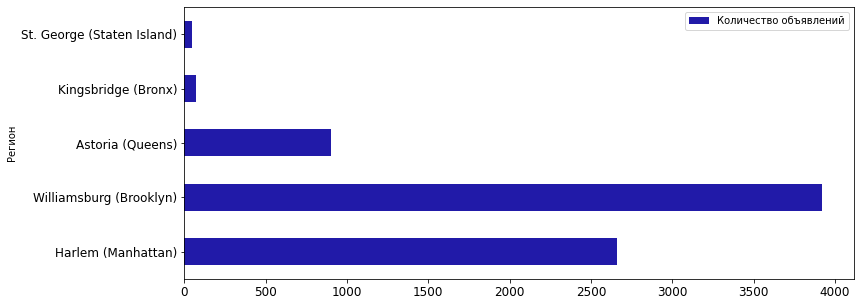

In [131]:
import numpy as np
color_rectangle = np.random.rand(7, 3)    # цвет
reg_df = pd.DataFrame({"Регион": name_region, "Количество объявлений":  cout})
reg_df.plot.barh(x="Регион",figsize=(12, 5), fontsize=12, color = color_rectangle)

In [7]:
# наглядно узнаем доступность жилья
avalibity_data = {availability_365: df["availability_365"].to_list().count(availability_365) for availability_365 in set(df["availability_365"])}
print(avalibity_data)
del avalibity_data[0]
cases1 = []
regions1 = []
for region, cases_num in avalibity_data.items():
    regions1.append(region)
    cases1.append(cases_num)

{0: 17533, 1: 408, 2: 270, 3: 306, 4: 233, 5: 340, 6: 245, 7: 219, 8: 233, 9: 193, 10: 165, 11: 173, 12: 172, 13: 162, 14: 173, 15: 159, 16: 151, 17: 130, 18: 125, 19: 135, 20: 134, 21: 128, 22: 129, 23: 135, 24: 131, 25: 92, 26: 101, 27: 103, 28: 108, 29: 113, 30: 108, 31: 127, 32: 130, 33: 89, 34: 134, 35: 168, 36: 141, 37: 119, 38: 125, 39: 88, 40: 83, 41: 90, 42: 102, 43: 111, 44: 97, 45: 92, 46: 82, 47: 66, 48: 100, 49: 87, 50: 90, 51: 85, 52: 91, 53: 96, 54: 101, 55: 89, 56: 75, 57: 76, 58: 88, 59: 83, 60: 91, 61: 80, 62: 70, 63: 85, 64: 113, 65: 91, 66: 143, 67: 112, 68: 87, 69: 81, 70: 78, 71: 81, 72: 76, 73: 78, 74: 88, 75: 70, 76: 88, 77: 94, 78: 91, 79: 79, 80: 98, 81: 110, 82: 79, 83: 183, 84: 108, 85: 93, 86: 86, 87: 150, 88: 200, 89: 361, 90: 290, 91: 50, 92: 42, 93: 50, 94: 41, 95: 77, 96: 59, 97: 59, 98: 59, 99: 50, 100: 37, 101: 46, 102: 47, 103: 38, 104: 33, 105: 57, 106: 40, 107: 43, 108: 35, 109: 36, 110: 45, 111: 33, 112: 51, 113: 40, 114: 32, 115: 41, 116: 45, 117

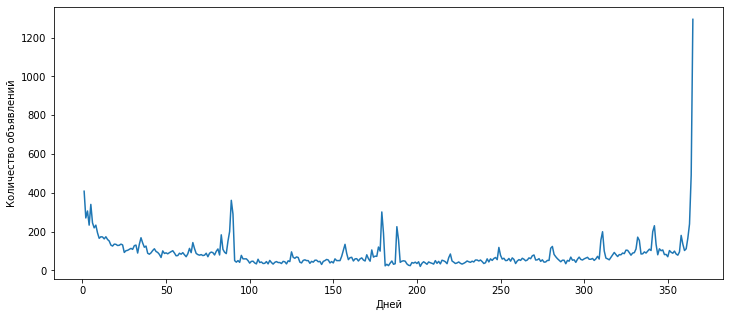

In [8]:
fig, ax = plt.subplots()
ax.plot(regions1, cases1)
ax.set_xlabel('Дней')
ax.set_ylabel('Количество объявлений')
fig.set_figwidth(12)
fig.set_figheight(5)

In [9]:
minimum_nights_data = {minimum_night: df["minimum_nights"].to_list().count(minimum_night) for minimum_night in set(df["minimum_nights"])}
print(minimum_nights_data)
cases1 = []
regions1 = []
for region, cases_num in minimum_nights_data.items():
    if region < 51:
        regions1.append(region)
        cases1.append(cases_num)

{1: 12720, 2: 11696, 3: 7999, 4: 3303, 5: 3034, 6: 752, 7: 2058, 8: 130, 9: 80, 10: 483, 11: 33, 12: 91, 13: 54, 14: 562, 15: 279, 16: 18, 17: 14, 18: 28, 19: 8, 20: 223, 21: 135, 22: 8, 23: 8, 24: 14, 25: 82, 26: 16, 27: 17, 28: 203, 29: 340, 30: 3760, 31: 201, 32: 8, 33: 2, 35: 15, 36: 1, 37: 1, 39: 1, 40: 13, 42: 1, 43: 1, 44: 2, 45: 32, 47: 2, 50: 14, 53: 2, 55: 4, 56: 2, 58: 1, 59: 6, 60: 106, 62: 3, 65: 1, 68: 1, 70: 8, 74: 1, 75: 4, 80: 9, 85: 1, 87: 1, 88: 2, 90: 104, 91: 3, 93: 2, 98: 1, 99: 2, 100: 15, 105: 2, 110: 3, 114: 1, 115: 2, 120: 28, 122: 1, 133: 2, 134: 1, 150: 6, 153: 1, 160: 2, 175: 1, 180: 43, 181: 2, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 198: 1, 200: 4, 210: 2, 222: 1, 225: 1, 1250: 1, 240: 3, 250: 1, 265: 1, 270: 2, 275: 1, 299: 1, 300: 6, 354: 1, 360: 5, 364: 1, 365: 29, 366: 1, 370: 1, 400: 1, 480: 1, 999: 3, 1000: 1, 500: 5}


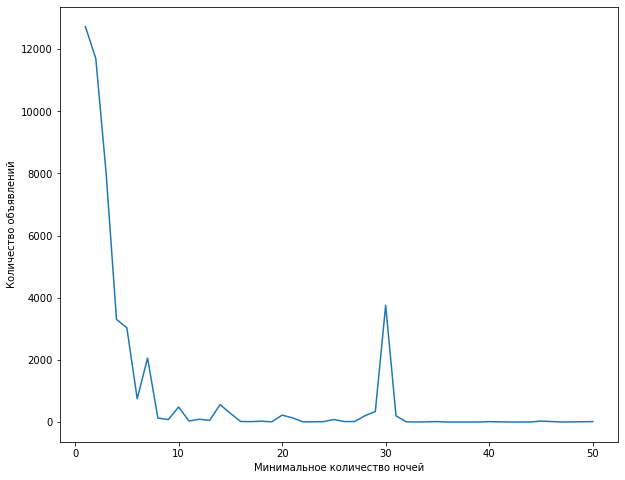

In [10]:
fig, ax = plt.subplots()
ax.plot(regions1, cases1)
ax.set_xlabel('Минимальное количество ночей')
ax.set_ylabel('Количество объявлений')
fig.set_figwidth(10)
fig.set_figheight(8)

In [44]:
couty = {calculated_host_listings_count: df["calculated_host_listings_count"].to_list().count(calculated_host_listings_count) for calculated_host_listings_count in set(df["calculated_host_listings_count"])}
del couty[327], couty[232]
print(couty)
cases1 = []
regions1 = []
for region, cases_num in couty.items():
        regions1.append(region)
        cases1.append(cases_num/region)

{1: 32303, 2: 6658, 3: 2853, 4: 1440, 5: 845, 6: 570, 7: 399, 8: 416, 9: 234, 10: 210, 11: 110, 12: 180, 13: 130, 14: 70, 15: 75, 16: 16, 17: 68, 18: 54, 19: 19, 20: 40, 21: 21, 23: 69, 25: 50, 26: 26, 27: 27, 28: 56, 29: 29, 30: 30, 31: 62, 32: 32, 33: 99, 34: 68, 37: 37, 39: 39, 43: 43, 47: 47, 49: 98, 50: 50, 52: 104, 65: 65, 87: 87, 91: 91, 96: 192, 103: 103, 121: 121}


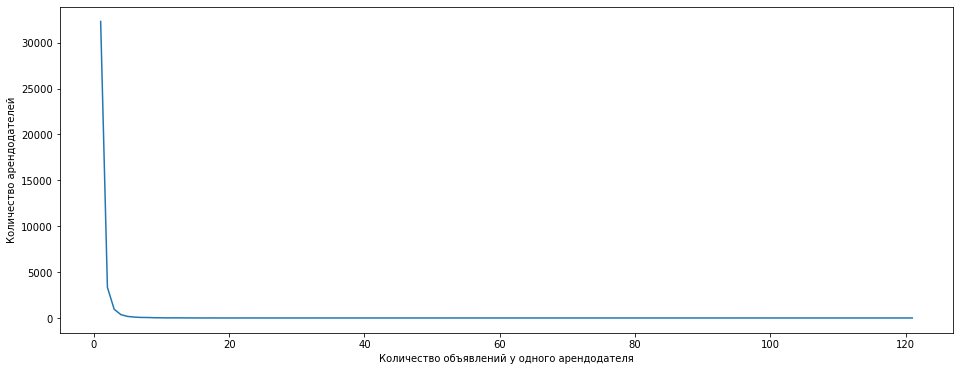

In [50]:
fig, ax = plt.subplots()
ax.plot( regions1, cases1)
ax.set_ylabel('Количество арендодателей')
ax.set_xlabel('Количество объявлений у одного арендодателя')
fig.set_figwidth(16)
fig.set_figheight(6)